In [1]:
niter = 10

In [2]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np

In [8]:
nx = 5
ny = 5

U = np.zeros((ny,nx))
s = sqra.sqra2d(U)

In [9]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptim(s, ts, penalty = 0.001, nonautonomous=True)

In [182]:
U_p = U.copy()
U_p[:,2] = 2
s_p = sqra.sqra2d(U_p)

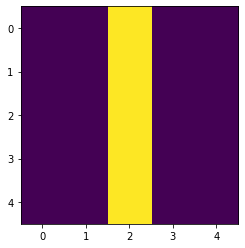

In [237]:
plt.imshow(s_p.u)

In [183]:
o_p=optim.SqraOptim(s_p, ts, penalty = 0.0001)

In [12]:
U_h = U.copy()
U_h[:,2] = np.inf
U_h[2,2] = 0
s_h = sqra.sqra2d(U_h, phi=10)

/usr/local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/alex/Documents/code/augjuc/sqra.py:96: RuntimeWarning: divide by zero encountered in true_divide
  D1 = sp.diags(1 / pi)


In [13]:
o_h=optim.SqraOptim(s_h, ts, penalty = 0.001)

# Experimental

In [14]:
%connect_info

{
  "shell_port": 50060,
  "iopub_port": 50061,
  "stdin_port": 50062,
  "control_port": 50064,
  "hb_port": 50063,
  "ip": "127.0.0.1",
  "key": "a0d09aff-070cd21016bff991daca5cf5",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-2cb90e9e-7306-4707-b564-c2c48662859b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [184]:
import ode
Qs = [s_p.Q] * 3
us = [s_p.u] * 3
dts = [1,1,5]
hpa = ode.finite_time_hitting_prob_adjoint(Qs, dts, us, nquad=100)

In [185]:
hp1 = hpa.finite_time_hitting_probs()

In [17]:
hp2 = ode.finite_time_hitting_probs(Qs, dts)
np.max(np.abs(hp1-hp2))

2.0876343986842016e-09

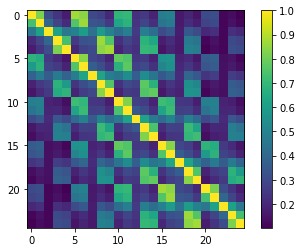

In [186]:
plt.imshow(hp1)
plt.colorbar()

In [187]:
o, du = hpa.min_and_derivative()
o

0.10177165504603419

In [188]:
hpa.activei, hpa.activej

(0, 24)

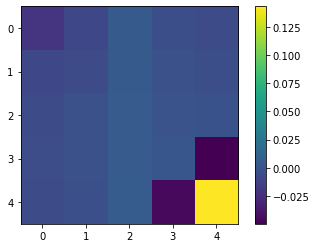

In [189]:
plt.imshow(du.reshape(ny,nx))
plt.colorbar()

In [190]:
sp = s_p.perturbed_copy(np.zeros(25))

In [191]:
ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad=100)

0.10177165504603419
0.09898994361484183
0.10158591450529679
0.0988238952512794
0.10219249407780318
0.09928584440343732
0.10189736387244008
0.09901690388091104
0.10216820563128576
0.09907823615946039


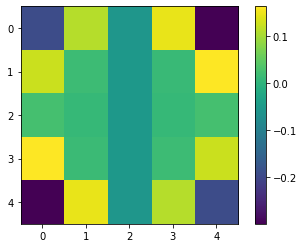

In [192]:
for i in range(10):
    ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad =100)
    m, d = ap.min_and_derivative()
    sp = sp.perturbed_copy(d*-1)
    print(m)
    plt.imshow(d.reshape((5,5)))
    plt.imshow(sp.u - s_p.u)

plt.colorbar()


In [205]:
import ode
problem = ode.Problem(s_p, [3])

In [215]:
problem.objwithpenalty(x0, 0.1)

-0.011615834870086253


(0.011615834870086253,
 array([ 0.00934014, -0.00186124,  0.00061829, -0.00041162, -0.00033563,
        -0.00162233, -0.00013585,  0.00078236, -0.00024641, -0.00036779,
        -0.00028244, -0.00012085,  0.00088764, -0.00014213, -0.00038936,
        -0.0003626 , -0.00024613,  0.00077554, -0.00034717, -0.00058464,
        -0.00033554, -0.00041791,  0.00057621, -0.00093746, -0.00383311]))

In [230]:
g0 = np.random.rand(25) / 100
x0 = np.zeros(25)
penalty = 0.0001
rprop = ode.Rprop(lambda x: problem.objwithpenalty(x, penalty)[1], x0, g0)

-0.011615834870086253


In [233]:
rprop.run(100)

-0.013900060627021473
-0.013999309826233586
-0.013995803790493037
-0.014073445675723887
-0.014098815773927298
-0.014118095129377986
-0.014143129108739199
-0.014164026601617011
-0.014185190703426127
-0.014221983774102791
-0.014259434654500316
-0.014306329739528173
-0.014362545859457789
-0.014427560388358358
-0.014503970812179679
-0.014594951969855382
-0.01469840147579107
-0.014830315530779924
-0.014751704518559991
-0.014903201946088837
-0.014938573350170096
-0.01499181457664445
-0.014985681951214708
-0.015006793433017477
-0.015012762134007113
-0.015019821749332779
-0.015028062210977251
-0.01503761567151454
-0.015048593965167226
-0.015061062231533372
-0.015074997661844869
-0.015090224518192447
-0.015106313329975684
-0.015082962280097572
-0.015130587062013957
-0.015091048224291378
-0.015095370824954074
-0.015070669191575228
-0.015056990886973712
-0.015040214821998008
-0.015019564933581211
-0.01499195167978194
-0.01495814775351705
-0.014916626717901353
-0.014865446692623841
-0.014802118917

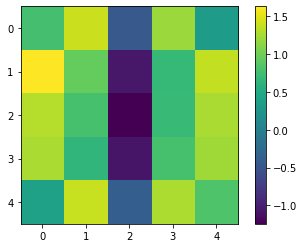

In [235]:
plt.imshow(rprop.x.reshape((5,5)))
plt.colorbar()

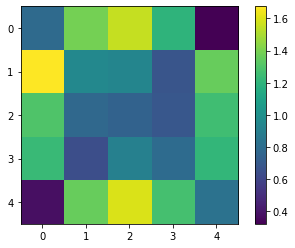

In [236]:
plt.imshow(problem.s.u)
plt.colorbar()